In [45]:
%config IPCompleter.greedy=True
%matplotlib inline

import os
import datetime
import sys

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# for visualization
import tensorflow

import torch
import torch.nn as nn
from torch.autograd import Variable

# Local
SR_DIR = os.path.abspath(os.path.join(os.pardir, os.pardir))
sys.path.append(SR_DIR)

from pytorch.visualization.tf_logger import Logger
tf_logger = Logger('/tmp/test')

## Setup Model##
Create a linear network 

In [46]:
class TestNet(nn.Module):
    def __init__(self):
        super().__init__()
        #self.conv = nn.Conv2d(1, 2, 1)
        self.lin = nn.Linear(1, 1, bias=True)
        
    def forward(self, x):
        y = self.lin(x)
        return y

# List all the parameters
net = TestNet()
params = list(net.parameters())
params

[Parameter containing:
 tensor([[-0.6470]], requires_grad=True), Parameter containing:
 tensor([0.3074], requires_grad=True)]

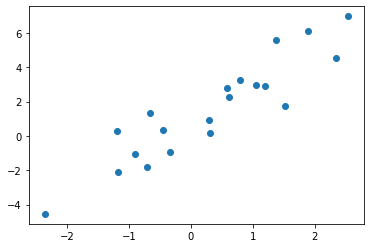

In [47]:
x = torch.randn(20, 1, dtype=torch.float32)
y = (2 * x + 1) + torch.randn(20, 1, dtype=torch.float32)
plt.scatter(x,y);

## Setup Training ##

In [48]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
epochs = 100

Total time in milisecond : 55


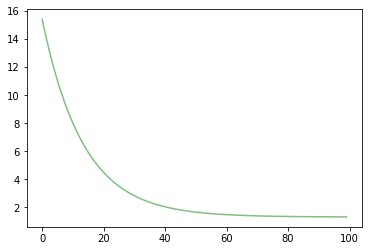

In [49]:
# CPU Training
start = datetime.datetime.now()
losses = []

# setting up mode
net.train()
for i in range(epochs):
    # making sure that it is not tracking old gradients 
    optimizer.zero_grad()    
    
    output = net.forward(x)
    loss = loss_function(output, y)
    loss.backward()
    optimizer.step()
    #print("epoch = {}\t loss = {}\t m:{} \t b:{}".format(i, loss, params[0].item(), params[1].item()))
    losses.append(loss)    
    
    #using Tensorboard to visualize epoch losses
    tf_logger.log_scalar("epoch_loss", loss, i)
end = datetime.datetime.now()

plt.plot(losses, 'g', label = 'from data', alpha = .5)

print ("Total time in milisecond : {}".format( int((end-start).total_seconds() * 1000)))

## Prediction ##

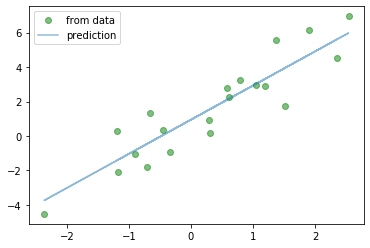

OrderedDict([('lin.weight', tensor([[1.9839]])), ('lin.bias', tensor([0.9454]))])


In [50]:
net.eval()
predicted = net.forward(x).data.numpy()

plt.plot(x.numpy(), y.numpy(), 'go', label = 'from data', alpha = .5)
plt.plot(x.numpy(), predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()
print(net.state_dict())